# IMPORT LIBRARY

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats 

# create the data set

In [3]:
# create the data set
np.random.seed(42)  #random nuber wont be generated
data = {
    'product_id': range(1,21),
    'product_name': [f'product{i}' for i in range(1,21)],
    'category': np.random.choice(['Electronic', 'Clothing','Home',' Sports'], 20),
    'units_sold' : np.random.poisson(lam=20, size=20),
    'slaes_date': pd.date_range(start = '2023-01-01', periods=20, freq='D')
}

#Display the data set
sales_data = pd.DataFrame(data)
print("Sales_Data")
print(sales_data)

Sales_Data
    product_id product_name    category  units_sold slaes_date
0            1     product1        Home          25 2023-01-01
1            2     product2      Sports          15 2023-01-02
2            3     product3  Electronic          17 2023-01-03
3            4     product4        Home          19 2023-01-04
4            5     product5        Home          21 2023-01-05
5            6     product6      Sports          17 2023-01-06
6            7     product7  Electronic          19 2023-01-07
7            8     product8  Electronic          16 2023-01-08
8            9     product9        Home          21 2023-01-09
9           10    product10    Clothing          21 2023-01-10
10          11    product11        Home          17 2023-01-11
11          12    product12        Home          22 2023-01-12
12          13    product13        Home          14 2023-01-13
13          14    product14        Home          17 2023-01-14
14          15    product15      Sports     

In [6]:
#To save the dataframe to csv file in my system
sales_data.to_csv('sales_dataset.csv', index=False)
#sales_data.to_csv('sales_dataset.csv')

In [7]:
import os 
os.getcwd()

'C:\\Users\\aneel.kumar\\NARESH_IT\\Statistics_Python'

# Descriptive statistics

In [12]:
#Descriptive statistics
desc_stat = sales_data['units_sold'].describe()
print('\nPrint descrptive stats for Units solds: ')
print(desc_stat)

mean_sales = sales_data['units_sold'].mean()
median_sales = sales_data['units_sold'].median()
mode_sales = sales_data['units_sold'].mode()[0]
variance_sales = sales_data['units_sold'].var()
std_deviation = sales_data['units_sold'].std()

category_stats = sales_data.groupby('category')['units_sold'].agg(['sum', 'mean', 'std']).reset_index()
#agg = aggeregate = average
#display the result
print('\nStatistical Analysis: ')
print(f'Mean Unit sold: {mean_sales}')
print(f'median Unit sold: {median_sales}')
print(f'Mode Unit sold: {mode_sales}')
print(f'variance Unit sold: {variance_sales}')
print(f'Standard deviation Unit sold: {std_deviation}')
print('\ncategory Statistics')
print(category_stats)


Print descrptive stats for Units solds: 
count    20.000000
mean     18.800000
std       3.302312
min      13.000000
25%      17.000000
50%      18.500000
75%      21.000000
max      25.000000
Name: units_sold, dtype: float64

Statistical Analysis: 
Mean Unit sold: 18.8
median Unit sold: 18.5
Mode Unit sold: 17
variance Unit sold: 10.90526315789474
Standard deviation Unit sold: 3.3023117899275864

category Statistics
     category  sum       mean       std
0      Sports  101  16.833333  2.714160
1    Clothing   21  21.000000       NaN
2  Electronic   73  18.250000  2.217356
3        Home  181  20.111111  3.723051


# Inferential Statistics

In [22]:
confidence_level = 0.95   #Sample test case for 95% 

degrees_freedom = len(sales_data['units_sold'])-1
sample_mean = mean_sales
sample_standard_error = std_deviation / np.sqrt(len(sales_data['units_sold']))

t_score = stats.t.ppf((1+ confidence_level)/2, degrees_freedom)
margin_of_error = t_score * sample_standard_error

#Finding the confidence interval
confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)

#Displaying dthe result
print("\nConfidence Interval for mean of Units Sold:")
print(confidence_interval)


Confidence Interval for mean of Units Sold:
(np.float64(17.254470507823573), np.float64(20.34552949217643))


In [24]:
t_statistic, p_value = stats.ttest_1samp(sales_data["units_sold"], 20)
print("\nHypothesis Testing (t-test): ")
print(f"T-Statistics: {t_statistic}, p_value: {p_value}")

if p_value < 0.05:
    print('Reject the null hypothesis: The mean units sold is different from 20')
else:
    print("Fail to reject the null  hypothesis: The mean units sold is not different from 20")


Hypothesis Testing (t-test): 
T-Statistics: -1.6250928099424466, p_value: 0.12061572226781002
Fail to reject the null  hypothesis: The mean uniots sold is not different from 20


# Visualization

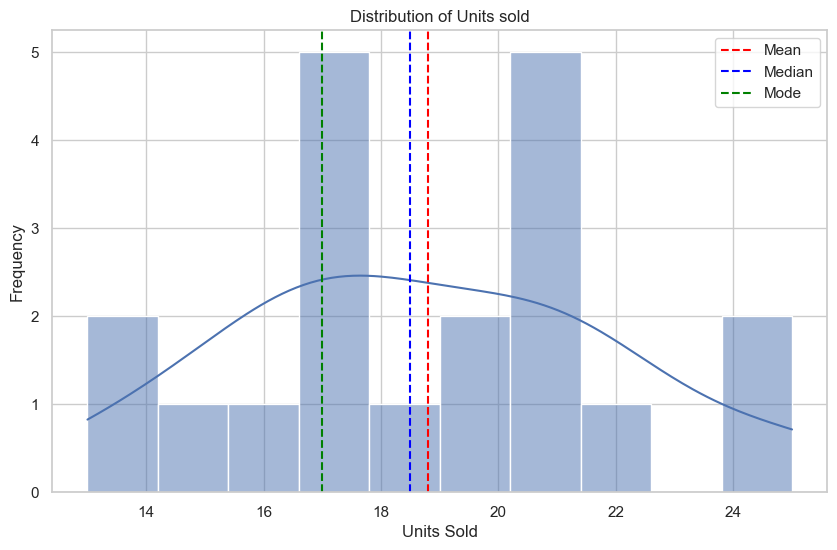

In [28]:
sns.set(style = 'whitegrid')

plt.figure(figsize=(10,6))
sns.histplot(sales_data['units_sold'], bins=10, kde= True)
plt.title("Distribution of Units sold")
plt.xlabel('Units Sold')
plt.ylabel("Frequency")
plt.axvline(mean_sales, color = 'red', linestyle= '--', label= 'Mean')
plt.axvline(median_sales, color = 'blue', linestyle= '--', label= 'Median')
plt.axvline(mode_sales, color = 'green', linestyle= '--', label= 'Mode')
plt.legend()
plt.show()



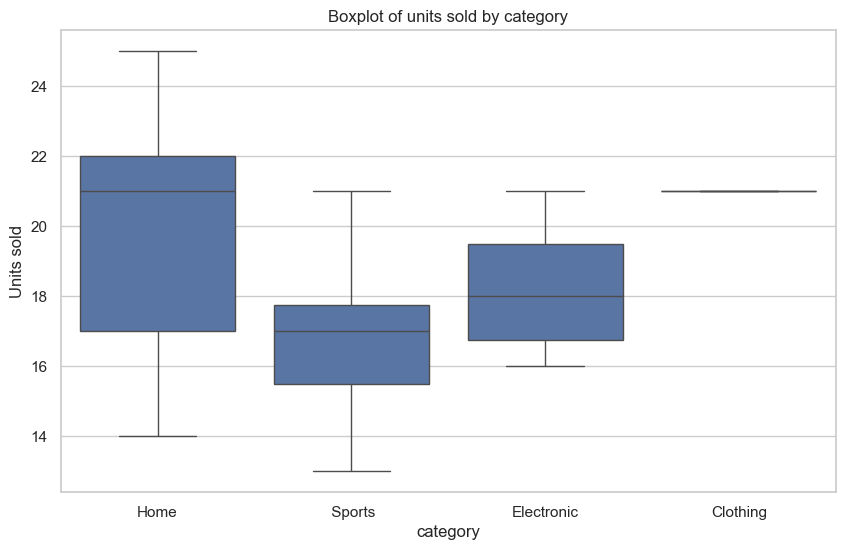

In [29]:
#Boxplot for units sold aby category 
plt.figure(figsize=(10,6))
sns.boxplot(x='category', y='units_sold', data=sales_data)
plt.title("Boxplot of units sold by category")
plt.xlabel("category")
plt.ylabel("Units sold")
plt.show()

In [ ]:
#Barplot for total units sold by category 
plt.figure(figsize=(10,6))

